In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('FaceMaskDetection')
jovian.set_colab_id('asdadaddadadad')

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 6.0MB/s 


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
url="https://www.kaggle.com/omkargurav/face-mask-dataset"


In [ ]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kogam22
Your Kaggle Key: ··········


  0%|          | 0.00/163M [00:00<?, ?B/s]

100%|██████████| 163M/163M [00:02<00:00, 84.0MB/s]


In [ ]:
#Importing the libraries
import os
import torchvision
from torchvision.datasets import ImageFolder
from pathlib import Path
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
data_dir = Path("./face-mask-dataset/data")
labels = os.listdir(data_dir)
labels

['with_mask', 'without_mask']

In [ ]:
# def conv_jpeg():
for folder in os.listdir(data_dir):
    for img in os.listdir(data_dir/folder):
        print(img)

In [ ]:
len(dataset)

7553

In [ ]:
# Load dataset and apply some transforms

# stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
dataset = ImageFolder(data_dir, tt.Compose([
    tt.Resize(64),
    tt.RandomCrop(64),
    tt.RandomHorizontalFlip(),
    tt.ToTensor(),
    # tt.Normalize(*stats),
    ]
))


Label: with_mask


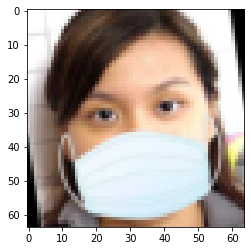

In [ ]:
#Showing image

img, label = dataset[888]
plt.imshow(img.permute(1, 2, 0))
print(f"Label: {labels[label]}")

Label: with_mask


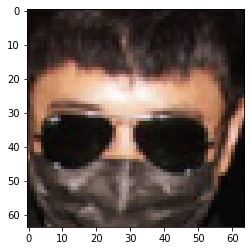

In [ ]:
img, label = dataset[250]
plt.imshow(img.permute((1,2,0)))
print(f"Label: {labels[label]}")

In [ ]:
# Set size of train_ds and val_ds

val_pct = 0.2
val_size = int(val_pct*len(dataset))
train_size = len(dataset)-val_size
train_size, val_size

(6043, 1510)

In [ ]:
# Split dataset
train_ds, valid_ds = random_split(dataset,[train_size,val_size])

In [ ]:
batch_size = 256

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size*2, num_workers=4, pin_memory=True)


torch.Size([256, 3, 64, 64])
tensor([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])


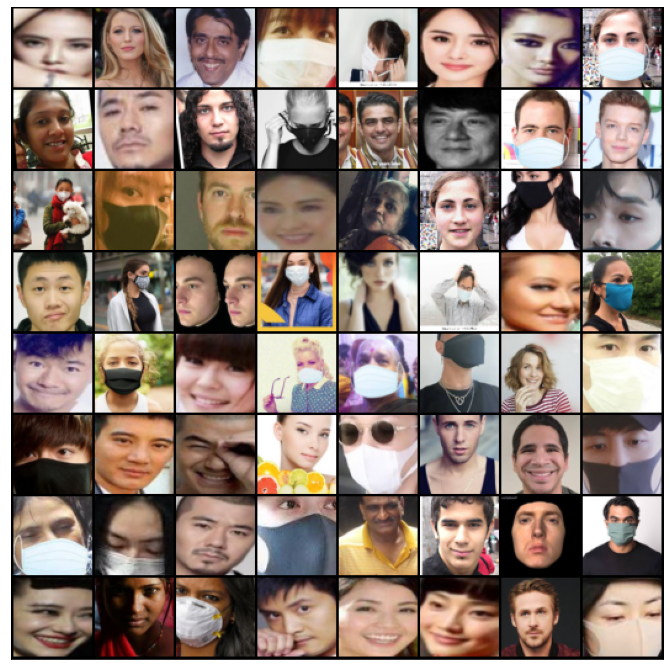

In [ ]:
def show_batch(dl):
    for images, labels in dl:
        print(images.shape)
        print(labels)
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

print(len(train_dl))
print(len(valid_dl))

24
3


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        print(out.shape)

        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
torch.cuda.empty_cache()

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.conv5 = conv_block(512,1024)
        self.res3 = nn.Sequential(conv_block(1024, 1024), conv_block(1024, 1024))
        self.conv6 = conv_block(1024,2048)
        self.res4 = nn.Sequential(conv_block(2048, 2048), conv_block(2048, 2048))

        self.flat = nn.Flatten()
        self.drop = nn.Dropout(0.2)
        self.linear = nn.Linear(2048*8*8, 2)
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out

        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out

        out=self.conv5(out)
        out=self.res3(out) + out
        
        out=self.conv6(out)
        out=self.res4(out) + out

        out = self.flat(out)
        out = self.drop(out)
        out = self.linear(out)
        return out

In [ ]:
model = to_device(ResNet9(3, 2), device)
# model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history = [evaluate(model, valid_dl)]
history


[{'val_acc': 0.0, 'val_loss': 11.782121658325195}]

In [ ]:
epochs = 20
max_lr = 0.01
grad_clip = 0.3
weight_decay = 1e-4
opt_func = torch.optim.Adam
history=[]

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 8])
after flat:  torch.Size([256, 131072])
Drop 0.2:  torch.Size([256, 131072])
Before flat:  torch.Size([256, 2048, 8, 

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

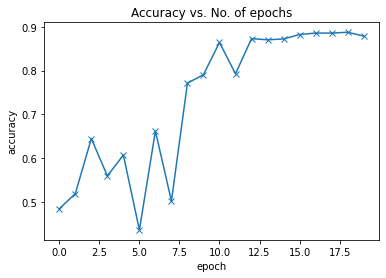

In [ ]:
plot_accuracies(history)

In [ ]:
test_data_link = "https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset"

In [ ]:
od.download(test_data_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kogam22
Your Kaggle Key: ··········


  3%|▎         | 9.00M/330M [00:00<00:06, 49.0MB/s]

100%|██████████| 330M/330M [00:02<00:00, 125MB/s] 


In [ ]:
td = './face-mask-12k-images-dataset/Face Mask Dataset/Test'
os.listdir(td)

['WithMask', 'WithoutMask']

In [ ]:
test_data = ImageFolder(td)

In [ ]:
test_data = ImageFolder(td,tt.Compose([
    tt.Resize(64),
    tt.RandomCrop(64),
    tt.RandomHorizontalFlip(),
    tt.ToTensor(),
    ]
))


In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_data, batch_size=batch_size*2), device)

In [ ]:
result = evaluate(model,test_loader)
result

Before flat:  torch.Size([512, 2048, 8, 8])
after flat:  torch.Size([512, 131072])
Drop 0.2:  torch.Size([512, 131072])
Before flat:  torch.Size([480, 2048, 8, 8])
after flat:  torch.Size([480, 131072])
Drop 0.2:  torch.Size([480, 131072])


{'val_acc': 0.9057291746139526, 'val_loss': 0.2848432660102844}

In [ ]:
torch.save(model.state_dict(), 'FaceMaskDetection.pth')


In [ ]:
jovian.log_hyperparams(arch='FaceDetection', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Hyperparams logged.


In [ ]:
jovian.log_metrics(test_acc=result['val_acc'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   )

[jovian] Metrics logged.


In [ ]:
jovian.commit(project_name="FaceMaskDetection", outputs=['FaceMaskDetection.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


ApiError: ignored